In [1]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("dengue_sinan.csv")

C:\Users\gsizi\AppData\Local\Temp\ipykernel_15992\3565987538.py:1: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dengue_sinan.csv")


In [4]:
data

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,166,2,A90,2016-03-13,201611,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,7061,2,A90,2024-02-21,202408,2024,29,292300,1388.0,2506254.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,4ca7df06d628b3ec9fcf8f4a3a8b11661f5e98b8e54b34...
620207,1257,2,A90,2024-03-04,202410,2024,29,291980,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,372024,2,A90,2024-01-26,202404,2024,29,292303,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,128,2,A90,2024-02-19,202408,2024,29,291400,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...


In [5]:
data.count()

NU_NOTIFIC           620211
TP_NOT               620211
ID_AGRAVO            620211
DT_NOTIFIC           620211
SEM_NOT              620211
                      ...  
CS_FLXRET            620209
FLXRECEBI                 0
IDENT_MICR           613280
MIGRADO_W                 0
ID_CNS_SUS_HASHED    620211
Length: 148, dtype: int64

In [6]:
# Conta os valores não nulos por coluna
non_null_counts = data.count()

# Filtra as colunas que têm 0 elementos (todos os valores são nulos)
zero_element_columns = non_null_counts[non_null_counts == 0].index.tolist()

zero_element_columns

#11 COLUNAS COM NENHUM DADO

['SOUNDEX',
 'EVIDENCIA',
 'CON_FHD',
 'DT_TRANSUS',
 'DT_TRANSDM',
 'DT_TRANSRM',
 'DT_TRANSRS',
 'DT_TRANSSE',
 'NU_LOTE_H',
 'FLXRECEBI',
 'MIGRADO_W']

In [7]:
data = data.drop(columns=zero_element_columns)

data.shape

(620211, 137)

In [8]:
print(data.columns)

Index(['NU_NOTIFIC', 'TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE',
       ...
       'NU_LOTE_I', 'DS_OBS', 'TP_SISTEMA', 'NDUPLIC_N', 'DT_DIGITA',
       'DT_TRANSSM', 'NU_LOTE_V', 'CS_FLXRET', 'IDENT_MICR',
       'ID_CNS_SUS_HASHED'],
      dtype='object', length=137)


In [9]:
equal_columns = [col for col in data.columns if data[col].nunique() == 1]

print(equal_columns)

['ID_AGRAVO', 'SG_UF', 'ID_PAIS', 'GENGIVO', 'METRO', 'SANGRAM', 'NU_LOTE_I', 'TP_SISTEMA', 'NDUPLIC_N', 'NU_LOTE_V']


In [10]:
#10 COLUNAS COM DADOS COMPLETAMENTE IGUAIS
data = data.drop(columns=equal_columns)

In [11]:
data.shape

(620211, 127)

In [12]:
data.count()

NU_NOTIFIC           620211
TP_NOT               620211
DT_NOTIFIC           620211
SEM_NOT              620211
NU_ANO               620211
                      ...  
DT_DIGITA            613311
DT_TRANSSM                2
CS_FLXRET            620209
IDENT_MICR           613280
ID_CNS_SUS_HASHED    620211
Length: 127, dtype: int64

In [13]:
data.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'LACO_N', 'PLASMATICO', 'PLAQ_MENOR', 'COMPLICA', 'DS_OBS', 'DT_DIGITA',
       'DT_TRANSSM', 'CS_FLXRET', 'IDENT_MICR', 'ID_CNS_SUS_HASHED'],
      dtype='object', length=127)

In [14]:
'''
Algumas outras colunas retiradas manualmente:

--> DDD_HOSP: Mesma informação da coluna de Município do Hospital
--> TEL_HOSP: Informação serve para a mesma coisa que o nome do hospital
'''

data = data.drop(columns=["DDD_HOSP","TEL_HOSP"])

In [15]:
data.shape

(620211, 125)

In [16]:
'''
Todas as colunas que indicam algum sinal de alarme da dengue foi retirada, pois a ideia é criar um
classificador para identificar se uma entidade tem dengue ou não, portanto, não faz sentido mantê-las
pois, elas não vão alterar em nada o aprendizado já que todas as entidades que possuem algum sinal de 
alarme, possuem dengue
'''

data = data.drop(columns=["ALRM_HIPOT", "ALRM_PLAQ", "ALRM_VOM", "ALRM_LETAR", "ALRM_SANG", "ALRM_HEMAT", "ALRM_HEPAT", "ALRM_LIQ", "DT_ALRM", "GRAV_PULSO", "GRAV_CONV", "GRAV_ENCH", "GRAV_INSUF", "GRAV_TAQUI", "GRAV_EXTRE", "GRAV_HIPOT", "GRAV_HEMAT", "GRAV_MELEN", "GRAV_METRO", "GRAV_SANG", "GRAV_AST", "GRAV_MIOC", "GRAV_CONSC", "GRAV_ORGAO"])

data.shape

(620211, 101)

In [17]:
data.columns

Index(['NU_NOTIFIC', 'TP_NOT', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'LACO_N', 'PLASMATICO', 'PLAQ_MENOR', 'COMPLICA', 'DS_OBS', 'DT_DIGITA',
       'DT_TRANSSM', 'CS_FLXRET', 'IDENT_MICR', 'ID_CNS_SUS_HASHED'],
      dtype='object', length=101)

In [18]:
for el in data.columns:
    print(el)

NU_NOTIFIC
TP_NOT
DT_NOTIFIC
SEM_NOT
NU_ANO
SG_UF_NOT
ID_MUNICIP
ID_REGIONA
ID_UNIDADE
DT_SIN_PRI
SEM_PRI
NU_IDADE_N
CS_SEXO
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_MN_RESI
ID_RG_RESI
ID_DISTRIT
ID_BAIRRO
NM_BAIRRO
ID_LOGRADO
ID_GEO1
ID_GEO2
NM_REFEREN
CS_ZONA
DT_INVEST
ID_OCUPA_N
FEBRE
MIALGIA
CEFALEIA
EXANTEMA
VOMITO
NAUSEA
DOR_COSTAS
CONJUNTVIT
ARTRITE
ARTRALGIA
PETEQUIA_N
LEUCOPENIA
LACO
DOR_RETRO
DIABETES
HEMATOLOG
HEPATOPAT
RENAL
HIPERTENSA
ACIDO_PEPT
AUTO_IMUNE
DT_CHIK_S1
DT_CHIK_S2
DT_PRNT
RES_CHIKS1
RES_CHIKS2
RESUL_PRNT
DT_SORO
RESUL_SORO
DT_NS1
RESUL_NS1
DT_VIRAL
RESUL_VI_N
DT_PCR
RESUL_PCR_
SOROTIPO
HISTOPA_N
IMUNOH_N
HOSPITALIZ
DT_INTERNA
UF
MUNICIPIO
HOSPITAL
TPAUTOCTO
COUFINF
COPAISINF
COMUNINF
CODISINF
CO_BAINF
NOBAIINF
CLASSI_FIN
CRITERIO
DOENCA_TRA
CLINC_CHIK
EVOLUCAO
DT_OBITO
DT_ENCERRA
ALRM_ABDOM
DT_GRAV
MANI_HEMOR
EPISTAXE
PETEQUIAS
HEMATURA
LACO_N
PLASMATICO
PLAQ_MENOR
COMPLICA
DS_OBS
DT_DIGITA
DT_TRANSSM
CS_FLXRET
IDENT_MICR
ID_CNS_SUS_HASHED


In [19]:
unique_columns = [col for col in data.columns if data[col].nunique() == len(data)]

print(unique_columns)

#NENHUMA COLUNA TEM TODOS OS DADOS DIFERENTES

[]


In [20]:
data.count()

NU_NOTIFIC           620211
TP_NOT               620211
DT_NOTIFIC           620211
SEM_NOT              620211
NU_ANO               620211
                      ...  
DT_DIGITA            613311
DT_TRANSSM                2
CS_FLXRET            620209
IDENT_MICR           613280
ID_CNS_SUS_HASHED    620211
Length: 101, dtype: int64

In [50]:
# Conta os valores não nulos por coluna
counts = data.count()

# Converter para um dicionário
counts_dict = counts.to_dict()

#print(counts_dict)

for k in counts_dict:
    print(f"{k} ---- {counts_dict[k]}")

NU_NOTIFIC ---- 620211
TP_NOT ---- 620211
DT_NOTIFIC ---- 620211
SEM_NOT ---- 620211
NU_ANO ---- 620211
SG_UF_NOT ---- 620211
ID_MUNICIP ---- 620211
ID_REGIONA ---- 619972
ID_UNIDADE ---- 619654
DT_SIN_PRI ---- 620209
SEM_PRI ---- 620211
NU_IDADE_N ---- 620211
CS_SEXO ---- 620153
CS_GESTANT ---- 620076
CS_RACA ---- 611679
CS_ESCOL_N ---- 477210
ID_MN_RESI ---- 620211
ID_RG_RESI ---- 620178
ID_DISTRIT ---- 60191
ID_BAIRRO ---- 406251
NM_BAIRRO ---- 547563
ID_LOGRADO ---- 2
ID_GEO1 ---- 67
ID_GEO2 ---- 16
NM_REFEREN ---- 36347
CS_ZONA ---- 560648
DT_INVEST ---- 555845
ID_OCUPA_N ---- 122513
FEBRE ---- 540788
MIALGIA ---- 540788
CEFALEIA ---- 540788
EXANTEMA ---- 540788
VOMITO ---- 540788
NAUSEA ---- 540788
DOR_COSTAS ---- 540788
CONJUNTVIT ---- 540788
ARTRITE ---- 540788
ARTRALGIA ---- 540788
PETEQUIA_N ---- 540788
LEUCOPENIA ---- 540788
LACO ---- 540788
DOR_RETRO ---- 540788
DIABETES ---- 540788
HEMATOLOG ---- 540788
HEPATOPAT ---- 540788
RENAL ---- 540788
HIPERTENSA ---- 540788
ACIDO_P

In [21]:
# Definir o limite de porcentagem de dados faltantes (90%)
threshold = 0.9

# Calcular a quantidade máxima de valores nulos permitidos por coluna
max_missing = int(threshold * len(data))

# Remover colunas com mais de 90% de dados faltantes
data_cleaned = data.dropna(axis=1, thresh=len(data) - max_missing)

print(data_cleaned)

        NU_NOTIFIC  TP_NOT  DT_NOTIFIC  SEM_NOT  NU_ANO  SG_UF_NOT  \
0              158       2  2016-03-05   201609    2016         29   
1              298       2  2016-02-15   201607    2016         29   
2             5082       2  2016-03-25   201612    2016         29   
3           111262       2  2016-03-24   201612    2016         29   
4              166       2  2016-03-13   201611    2016         29   
...            ...     ...         ...      ...     ...        ...   
620206        7061       2  2024-02-21   202408    2024         29   
620207        1257       2  2024-03-04   202410    2024         29   
620208      372024       2  2024-01-26   202404    2024         29   
620209         128       2  2024-02-19   202408    2024         29   
620210        2257       2  2024-03-26   202413    2024         29   

        ID_MUNICIP  ID_REGIONA  ID_UNIDADE  DT_SIN_PRI  ...  COMUNINF  \
0           292210      1381.0   2498731.0  2016-03-02  ...       NaN   
1           2

In [52]:
# Conta os valores não nulos por coluna
counts = data_cleaned.count()

# Converter para um dicionário
counts_dict = counts.to_dict()

#print(counts_dict)

for k in counts_dict:
    print(f"{k} ---- {counts_dict[k]}")

NU_NOTIFIC ---- 620211
TP_NOT ---- 620211
DT_NOTIFIC ---- 620211
SEM_NOT ---- 620211
NU_ANO ---- 620211
SG_UF_NOT ---- 620211
ID_MUNICIP ---- 620211
ID_REGIONA ---- 619972
ID_UNIDADE ---- 619654
DT_SIN_PRI ---- 620209
SEM_PRI ---- 620211
NU_IDADE_N ---- 620211
CS_SEXO ---- 620153
CS_GESTANT ---- 620076
CS_RACA ---- 611679
CS_ESCOL_N ---- 477210
ID_MN_RESI ---- 620211
ID_RG_RESI ---- 620178
ID_BAIRRO ---- 406251
NM_BAIRRO ---- 547563
CS_ZONA ---- 560648
DT_INVEST ---- 555845
ID_OCUPA_N ---- 122513
FEBRE ---- 540788
MIALGIA ---- 540788
CEFALEIA ---- 540788
EXANTEMA ---- 540788
VOMITO ---- 540788
NAUSEA ---- 540788
DOR_COSTAS ---- 540788
CONJUNTVIT ---- 540788
ARTRITE ---- 540788
ARTRALGIA ---- 540788
PETEQUIA_N ---- 540788
LEUCOPENIA ---- 540788
LACO ---- 540788
DOR_RETRO ---- 540788
DIABETES ---- 540788
HEMATOLOG ---- 540788
HEPATOPAT ---- 540788
RENAL ---- 540788
HIPERTENSA ---- 540788
ACIDO_PEPT ---- 540788
AUTO_IMUNE ---- 540788
DT_SORO ---- 122731
RESUL_SORO ---- 240156
RESUL_NS1 --

In [22]:
data_cleaned["CS_ESCOL_N"].unique()

array([10.,  1.,  0., nan,  6.,  9.,  5.,  4.,  3.,  7.,  8.,  2.])

In [23]:
'''
Colunas que ficaram:

- Todas relacionadas a algum sintoma ou a alguma condição de saúde:

"FEBRE", "MIALGIA", "CEFALEIA", "EXANTEMA", "VOMITO", "NAUSEA", "DOR_COSTAS", "CONJUNTVIT", 
"ARTRITE", "ARTRALGIA", "PETEQUIA_N", "LEUCOPENIA", "LACO", "DOR_RETRO", "DIABETES",
"HEMATOLOG", "HEPATOPAT", "RENAL", "HIPERTENSA", "ACIDO_PEPT", "AUTO_IMUNE"

- Coluna relacionada a Data da notificação, retirando o dia, deixando ano e mês:

"DT_NOTIFIC"

- Colunas relacionadas aos locais das notificações:
"SG_UF_NOT", "ID_MUNICIP", "ID_UNIDADE", 

- Colunas relacionadas à características dos pacientes:
"CS_SEXO", "CS_GESTANT" (mudando para 'S' se gravida e 'N' para não gravida),
"CS_ESCOL_N", "CS_RACA", 

- Campo alvo:

"CLASSI_FIN"

'''
data_cleaned["DT_NOTIFIC"] = data_cleaned["DT_NOTIFIC"].str.slice(0, 7)

def transformar(x):
    if pd.isna(x):
        return np.nan
    elif x in [1, 2, 3, 4]:
        return 'S'
    elif x in [5, 6, 9]:
        return 'N'
    else:
        return x

# Aplicar a transformação na coluna
data_cleaned['CS_GESTANT'] = data_cleaned['CS_GESTANT'].apply(transformar)

C:\Users\gsizi\AppData\Local\Temp\ipykernel_15992\1191215931.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["DT_NOTIFIC"] = data_cleaned["DT_NOTIFIC"].str.slice(0, 7)
C:\Users\gsizi\AppData\Local\Temp\ipykernel_15992\1191215931.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['CS_GESTANT'] = data_cleaned['CS_GESTANT'].apply(transformar)


In [24]:
data_fil = data_cleaned[["FEBRE", "MIALGIA", "CEFALEIA", "EXANTEMA", "VOMITO", "NAUSEA", "DOR_COSTAS", 
                         "CONJUNTVIT", "ARTRITE", "ARTRALGIA", "PETEQUIA_N", "LEUCOPENIA", "LACO", 
                         "DOR_RETRO", "DIABETES", "HEMATOLOG", "HEPATOPAT", "RENAL", "HIPERTENSA", 
                         "ACIDO_PEPT", "AUTO_IMUNE", "DT_NOTIFIC", "SG_UF_NOT", "ID_MUNICIP", 
                         "ID_UNIDADE", "CS_SEXO", "CS_GESTANT", "CLASSI_FIN"]]

data_fil

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CS_SEXO,CS_GESTANT,CLASSI_FIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-03,29,292210,2498731.0,M,N,8.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-02,29,293290,3280969.0,M,N,8.0
2,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2016-03,29,293250,2800527.0,F,N,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-03,29,291360,2706628.0,F,N,10.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016-03,29,292210,2498731.0,F,N,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2024-02,29,292300,2506254.0,M,N,NaN
620207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2024-03,29,291980,7175973.0,M,N,NaN
620208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2024-01,29,292303,6540007.0,F,N,8.0
620209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2024-02,29,291400,2824558.0,F,N,NaN


In [25]:
final_data = data_fil.dropna()

In [26]:
final_data

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CS_SEXO,CS_GESTANT,CLASSI_FIN
2,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2016-03,29,293250,2800527.0,F,N,10.0
5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2016-06,29,290460,5075076.0,F,N,10.0
6,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2016-03,29,291560,2414155.0,F,N,8.0
9,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2016-01,29,291810,2483114.0,M,N,10.0
10,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2016-01,29,290560,2771195.0,F,N,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615865,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2024-02,29,291300,2412713.0,M,N,5.0
615866,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2024-02,29,293330,2486555.0,F,N,5.0
615867,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2024-02,29,292180,2557088.0,F,N,10.0
615869,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2024-02,29,291640,3791378.0,M,N,10.0


<Axes: >

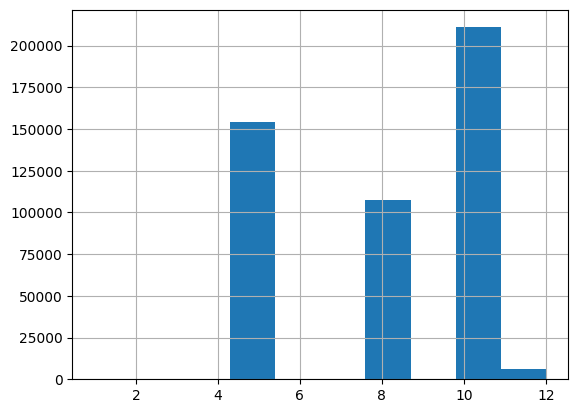

In [27]:
final_data["CLASSI_FIN"].hist()

In [28]:
final_data = final_data[final_data["CLASSI_FIN"] != 8.0]

<Axes: >

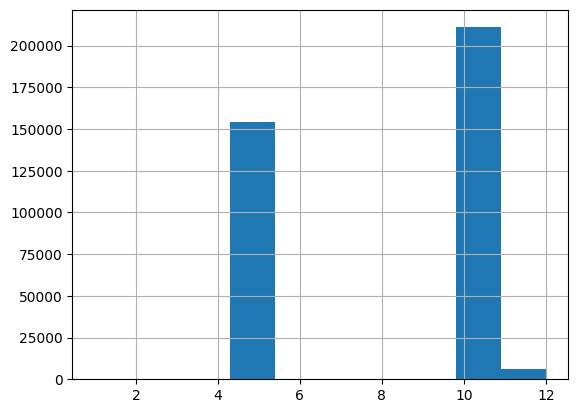

In [29]:
final_data["CLASSI_FIN"].hist()

C:\Users\gsizi\AppData\Local\Temp\ipykernel_15992\4146219527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['CLASSI_FIN'] = final_data['CLASSI_FIN'].apply(lambda x: 10.0 if x > 10.0 else x)


<Axes: >

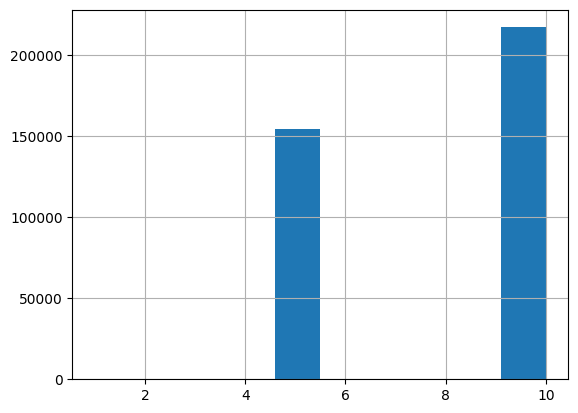

In [30]:
final_data['CLASSI_FIN'] = final_data['CLASSI_FIN'].apply(lambda x: 10.0 if x > 10.0 else x)

final_data['CLASSI_FIN'].hist()

In [31]:
final_data.shape

(371275, 28)

In [32]:
final_data.to_csv('dengue_sinan_processed.csv', index=False)